## Library Imports

In [709]:
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Loading and understanding the dataset

In [710]:
bike_rental_df = pd.read_csv('day.csv')

In [711]:
# reviewing first 5 rows of the dataset
bike_rental_df.head()

# Observation: instant variable is nothing but the serial number of the records which can drop moving forward

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [712]:
# checking if there are any null records
bike_rental_df.info()

# Observation: There are no null records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [713]:
# Understading the continuous variables
bike_rental_df.describe()

# Obseravtion: atemp and temp is not very different we can review these columns further

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [714]:
# gets the sum of all the rows that are completely null
print('Number of null rows: ')
bike_rental_df.isnull().all(axis=1).sum()

# Observation: There are no completely null rows present in dataset

Number of null rows: 


0

In [715]:
bike_rental_df.rename(columns = {'yr':'year','mnth':'month','hum':'humidity','cnt':'count'}, inplace = True) 
bike_rental_df.head()


,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Converting non-binary categorical variables to there original values

In [716]:

season_mapping_dict = {
    1:'spring', 
    2:'summer', 
    3:'fall', 
    4:'winter'
}
bike_rental_df['season'] = bike_rental_df['season'].map(season_mapping_dict)

month_dict = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug',
              9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
bike_rental_df['month'] = bike_rental_df['month'].map(month_dict)

weekday_dict = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat'}
bike_rental_df['weekday'] = bike_rental_df['weekday'].map(weekday_dict)


weathersit_dict = {1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'}
bike_rental_df['weathersit']=bike_rental_df.weathersit.map(weathersit_dict)

In [717]:
bike_rental_df.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Analysing all the continuous variable with each other

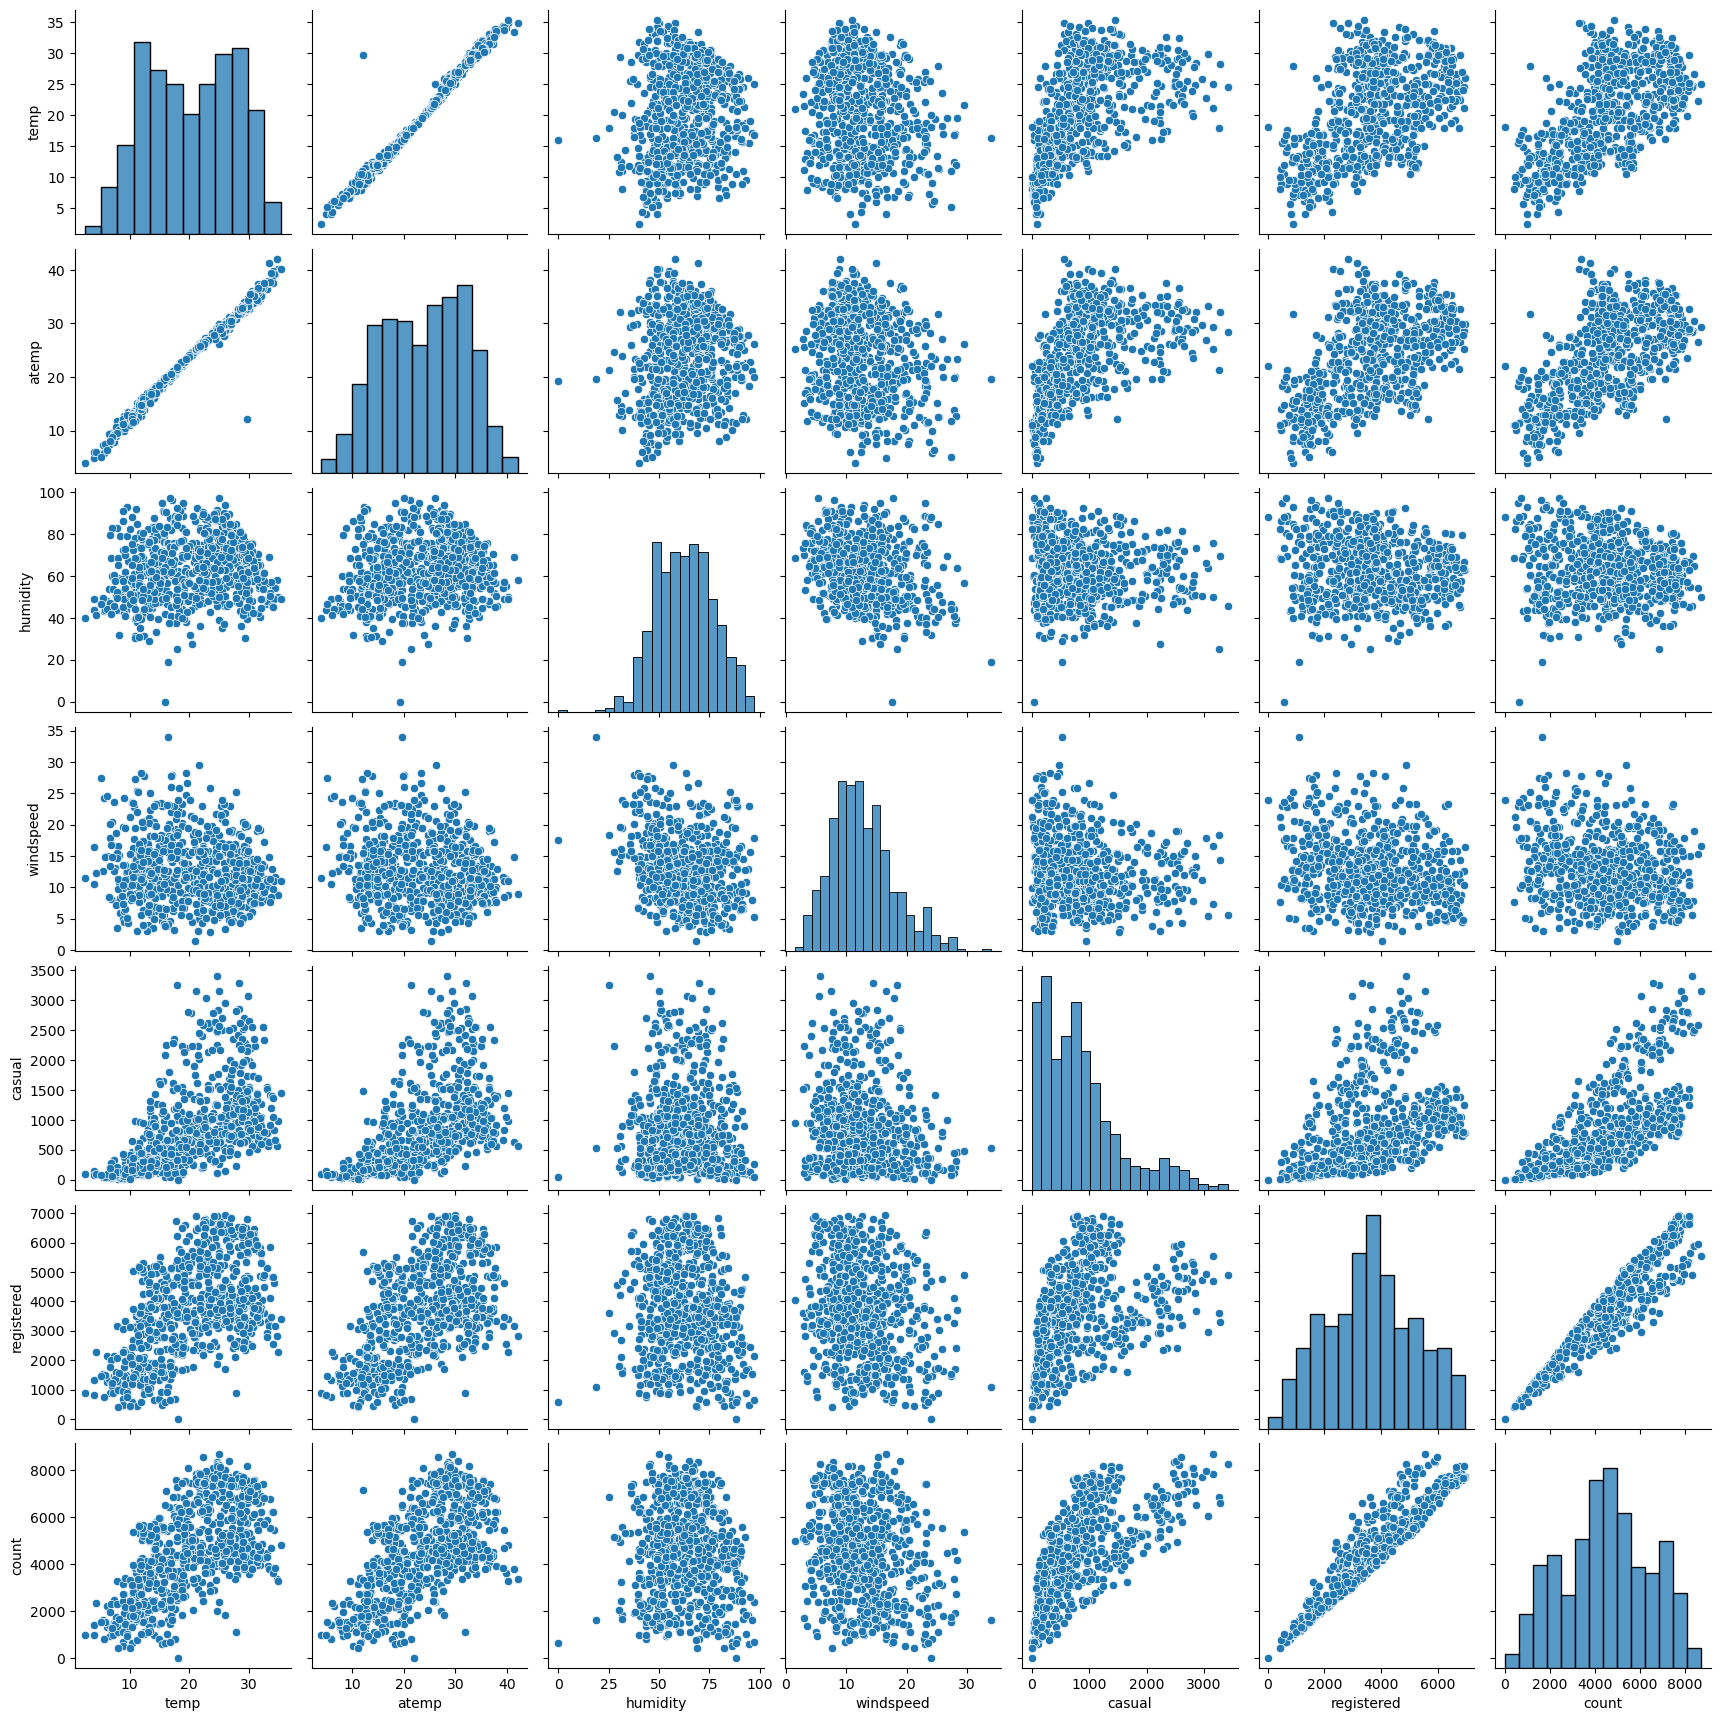

In [718]:
continuous_varList = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
sns.pairplot(bike_rental_df, vars=continuous_varList)
plt.show()

# Observation: We can see high simlarity of plot between count & temp, count & atemp, which means
# the values of temp and atemp is very similar, thus we can drop the atemp column after reviewing
# the correlation matrix.

## Analysing all the categorical variables with target variable

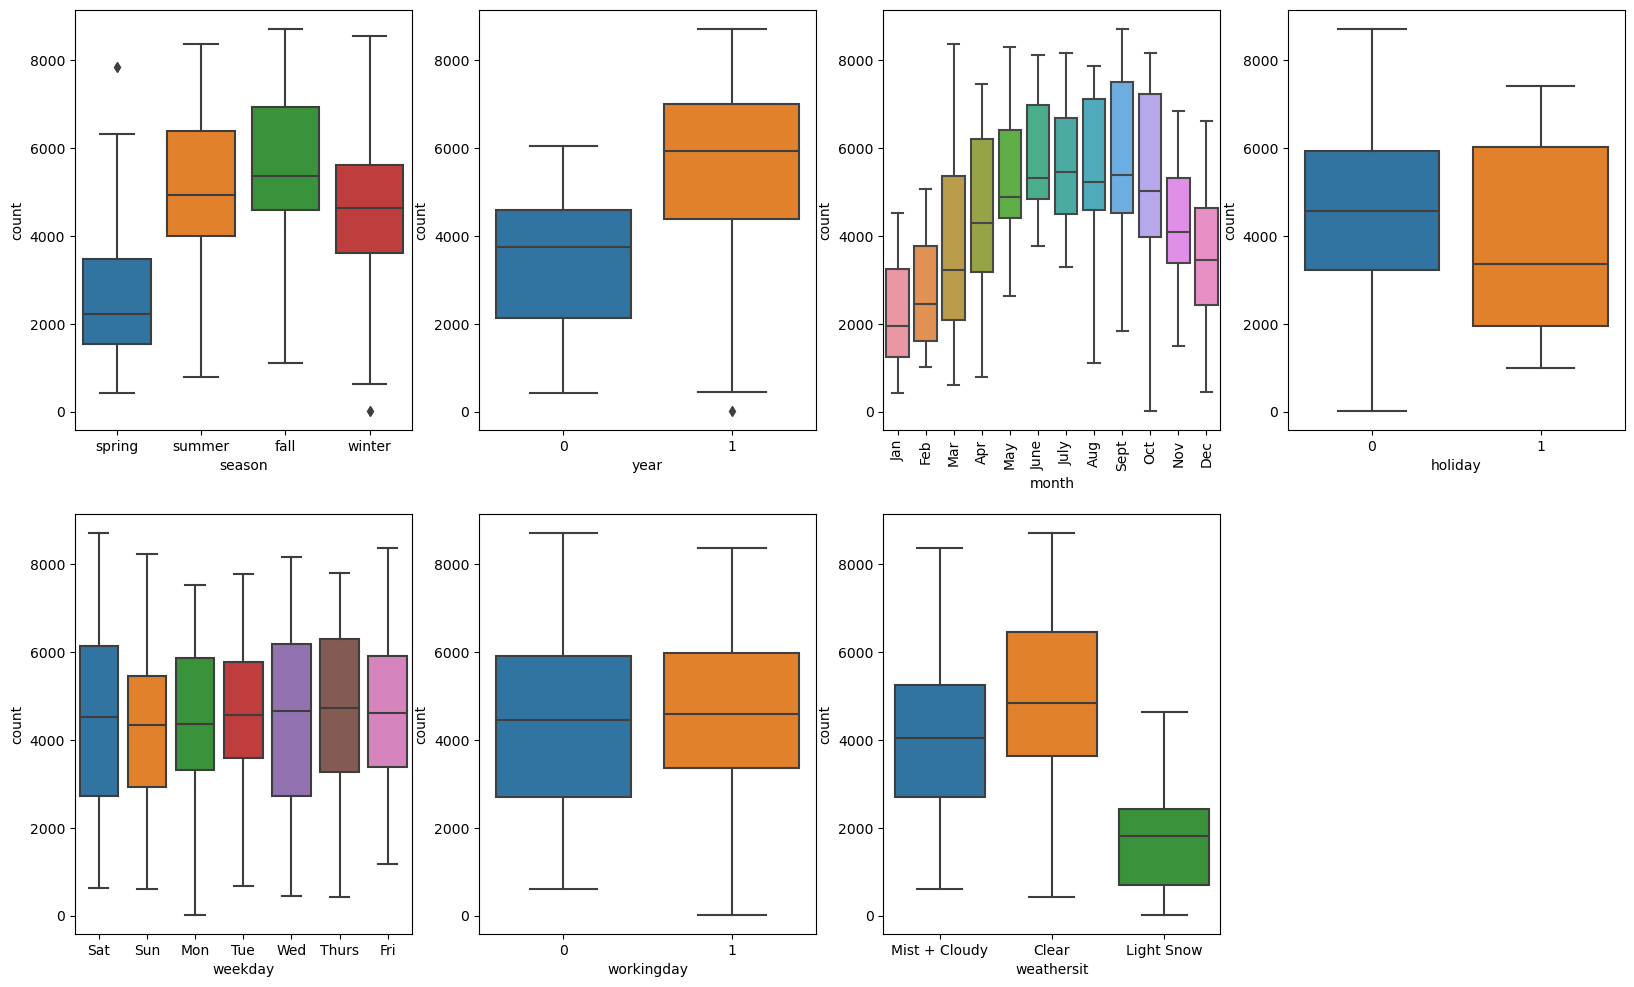

In [719]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'count', data = bike_rental_df)
plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'count', data = bike_rental_df)
plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'count', data = bike_rental_df)
plt.xticks(rotation=90)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'count', data = bike_rental_df)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'count', data = bike_rental_df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'count', data = bike_rental_df)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'count', data = bike_rental_df)
plt.show()

# Observations: 
# 1. High number of bike rents on fall and then summer season compare to other seasons
# 2. Year 2019 have higher number of bike rents than year 2018
# 3. Higher number of bike rents when on clear weather compare to other weather conditions
# 4. There are more bike rents on Saturdays, Thursdays, and Wednesdays compare to other weekdays. 

# Bivariate Analysis

### Analysing variables with target variable

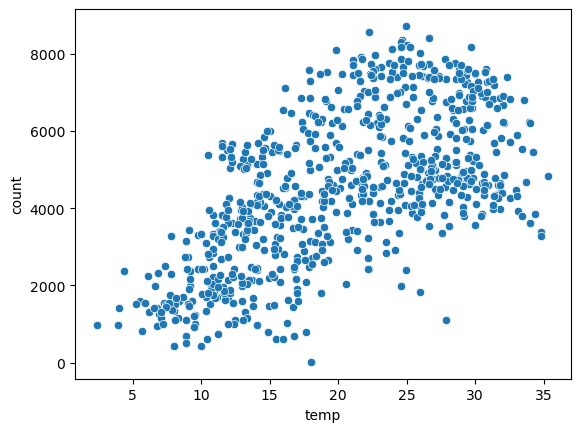

In [720]:
sns.scatterplot(data=bike_rental_df, x='temp', y='count')
plt.show()

# Observations: More number of bike rents on higher temperature reange between 20-30

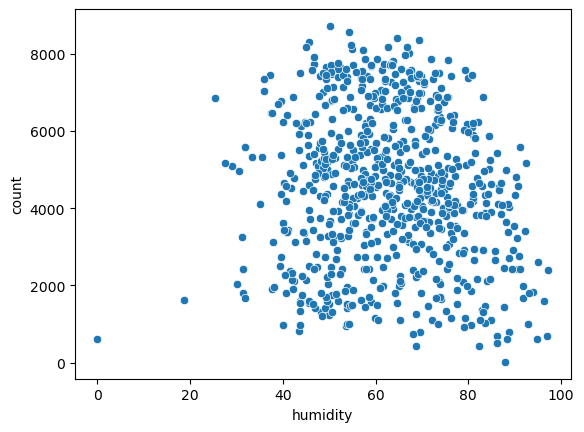

In [721]:
sns.scatterplot(data=bike_rental_df, x='humidity', y='count')
plt.show()

# Observations: More number of bike rents when humidity is high, in range from 40 to 80.

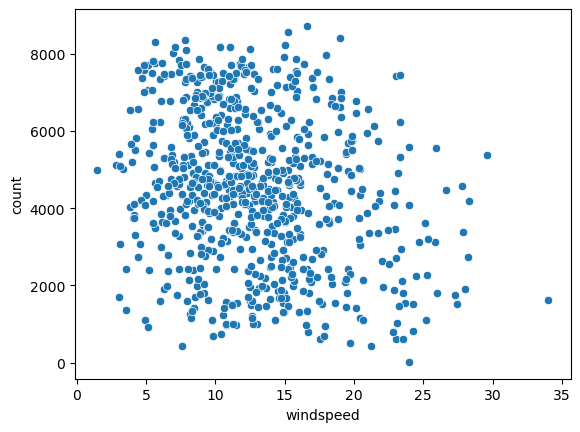

In [722]:
sns.scatterplot(data=bike_rental_df, x='windspeed', y='count')
plt.show()

# Observation: More bike rents on low wind speed.

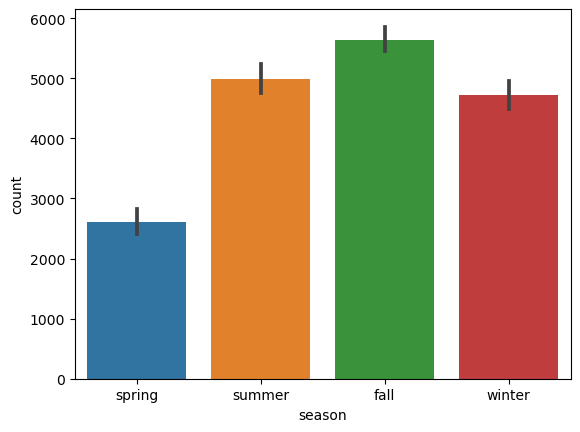

In [723]:
sns.barplot(data=bike_rental_df, x='season', y='count')
plt.show()

# Observation: Number of bike rents are high on fall and then summer season, compare to winter and spring.

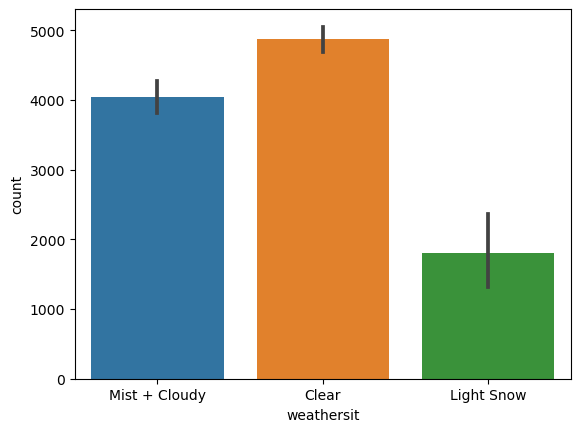

In [724]:
sns.barplot(data=bike_rental_df, x='weathersit', y='count')
plt.show()

# Observation: More bike rents on clear weather.

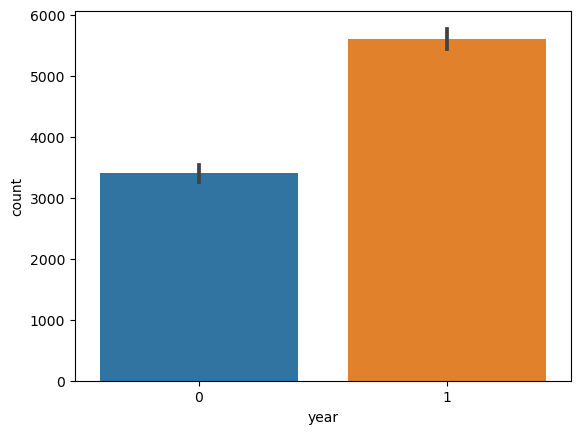

In [725]:
sns.barplot(data=bike_rental_df, x='year', y='count')
plt.show()

# Observation: More bike rents on year 2019 compare to year 2018

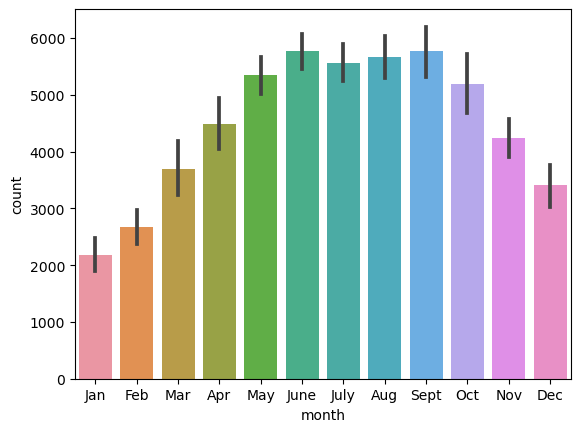

In [726]:
sns.barplot(data=bike_rental_df, x='month', y='count')
plt.show()

# Observation: Overall more number of bike rent in the month of September

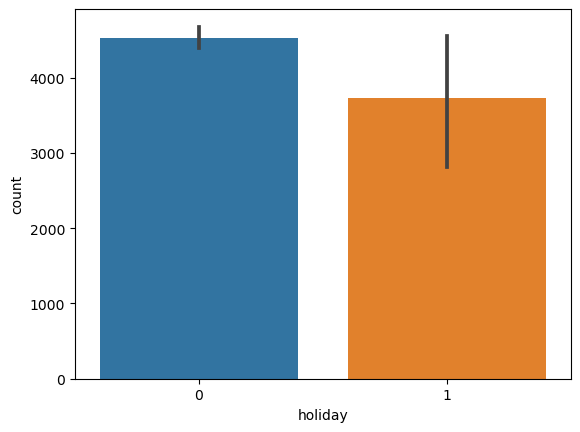

In [727]:
sns.barplot(data=bike_rental_df, x='holiday', y='count')
plt.show()

# Observation: More number of bike rents when it's not a holiday.

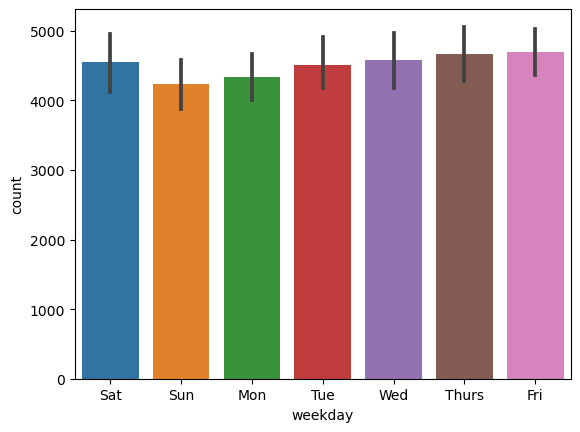

In [728]:
sns.barplot(data=bike_rental_df, x='weekday', y='count')
plt.show()

# Observation: More bike rents Saturday, 

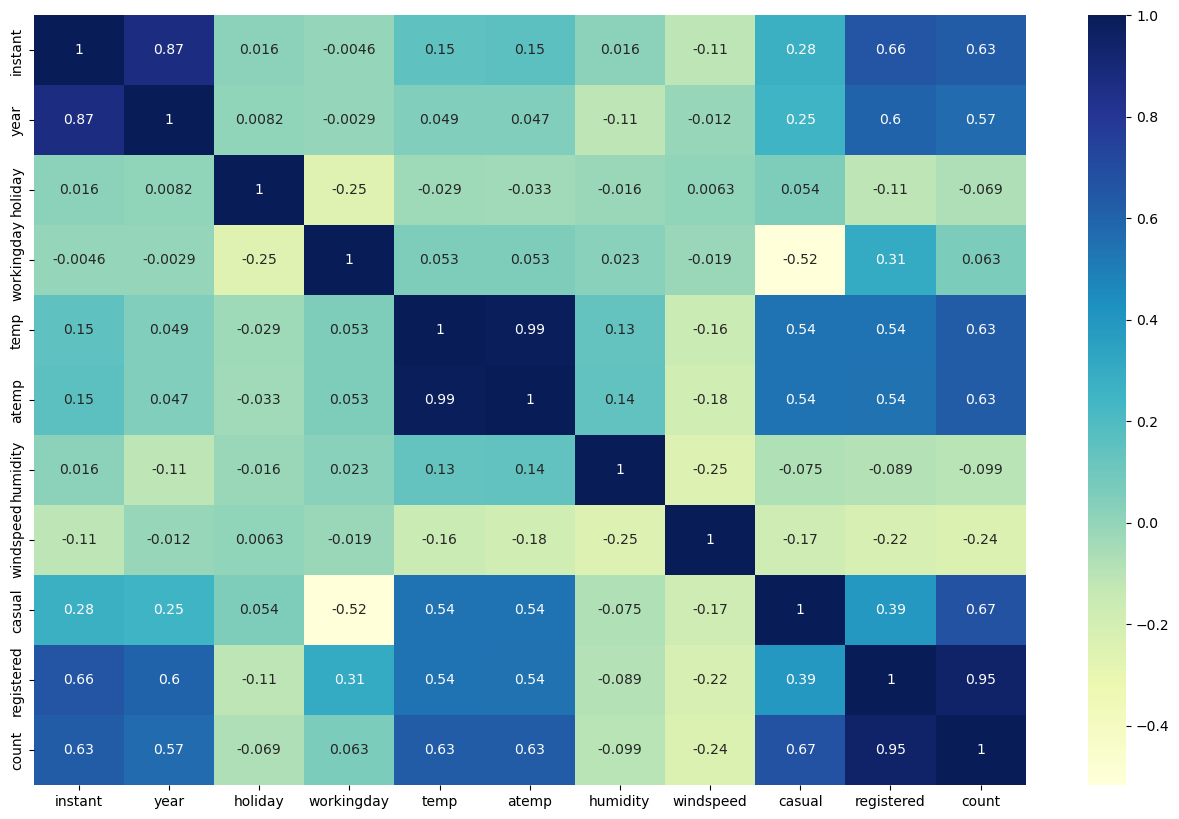

'\nObservations: \n1. We can observe from the above pairplot and this correlation matrix that temp, atemp, casual, registered, instant\n    variable are highly correlated with count variable\n2. We can verify that the plot does interpret the data well so a model with linear regression can be applicable here. \n'

In [729]:
plt.figure(figsize=(16,10))
sns.heatmap(bike_rental_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

'''
Observations: 
1. We can observe from the above pairplot and this correlation matrix that temp, atemp, casual, registered, instant
    variable are highly correlated with count variable
2. We can verify that the plot does interpret the data well so a model with linear regression can be applicable here. 
'''

In [730]:
# dropping highly correlated columns which shows that the data for them are similar
'''
1. atemp is dropped because it's data is almost similar to what temp column has
2. casual and registered are dropped because we are fousing on total count which is specified
    in count column which is our target variable too.
'''

similar_variables = ['atemp', 'casual', 'registered']
bike_rental_df.drop(similar_variables, axis=1, inplace=True)

In [731]:
# dropping instant and dteday column as there is no use of it for our business goal
bike_rental_df.drop(['instant', 'dteday'], axis=1, inplace=True)

In [732]:
# checking the info about the dataset again
bike_rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  count       730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


## Data Preparation

### Dummy Variable Creation

In [733]:
# Creating dummy variables for season, weathersit, month and weekday
season = pd.get_dummies(bike_rental_df['season'], drop_first=True)
weathersit = pd.get_dummies(bike_rental_df['weathersit'], drop_first=True)
month = pd.get_dummies(bike_rental_df['month'], drop_first=True)
weekday = pd.get_dummies(bike_rental_df['weekday'], drop_first=True)

In [734]:
bike_rental_df = pd.concat([bike_rental_df, season, weathersit, month, weekday], axis=1)


In [735]:
bike_rental_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count,spring,summer,winter,Light Snow,Mist + Cloudy,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thurs,Tue,Wed
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [736]:
# dropping variables for which dummy variables was created
bike_rental_df.drop(['season', 'weathersit', 'month', 'weekday'], axis=1, inplace=True)


In [737]:
bike_rental_df.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,Light Snow,Mist + Cloudy,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thurs,Tue,Wed
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


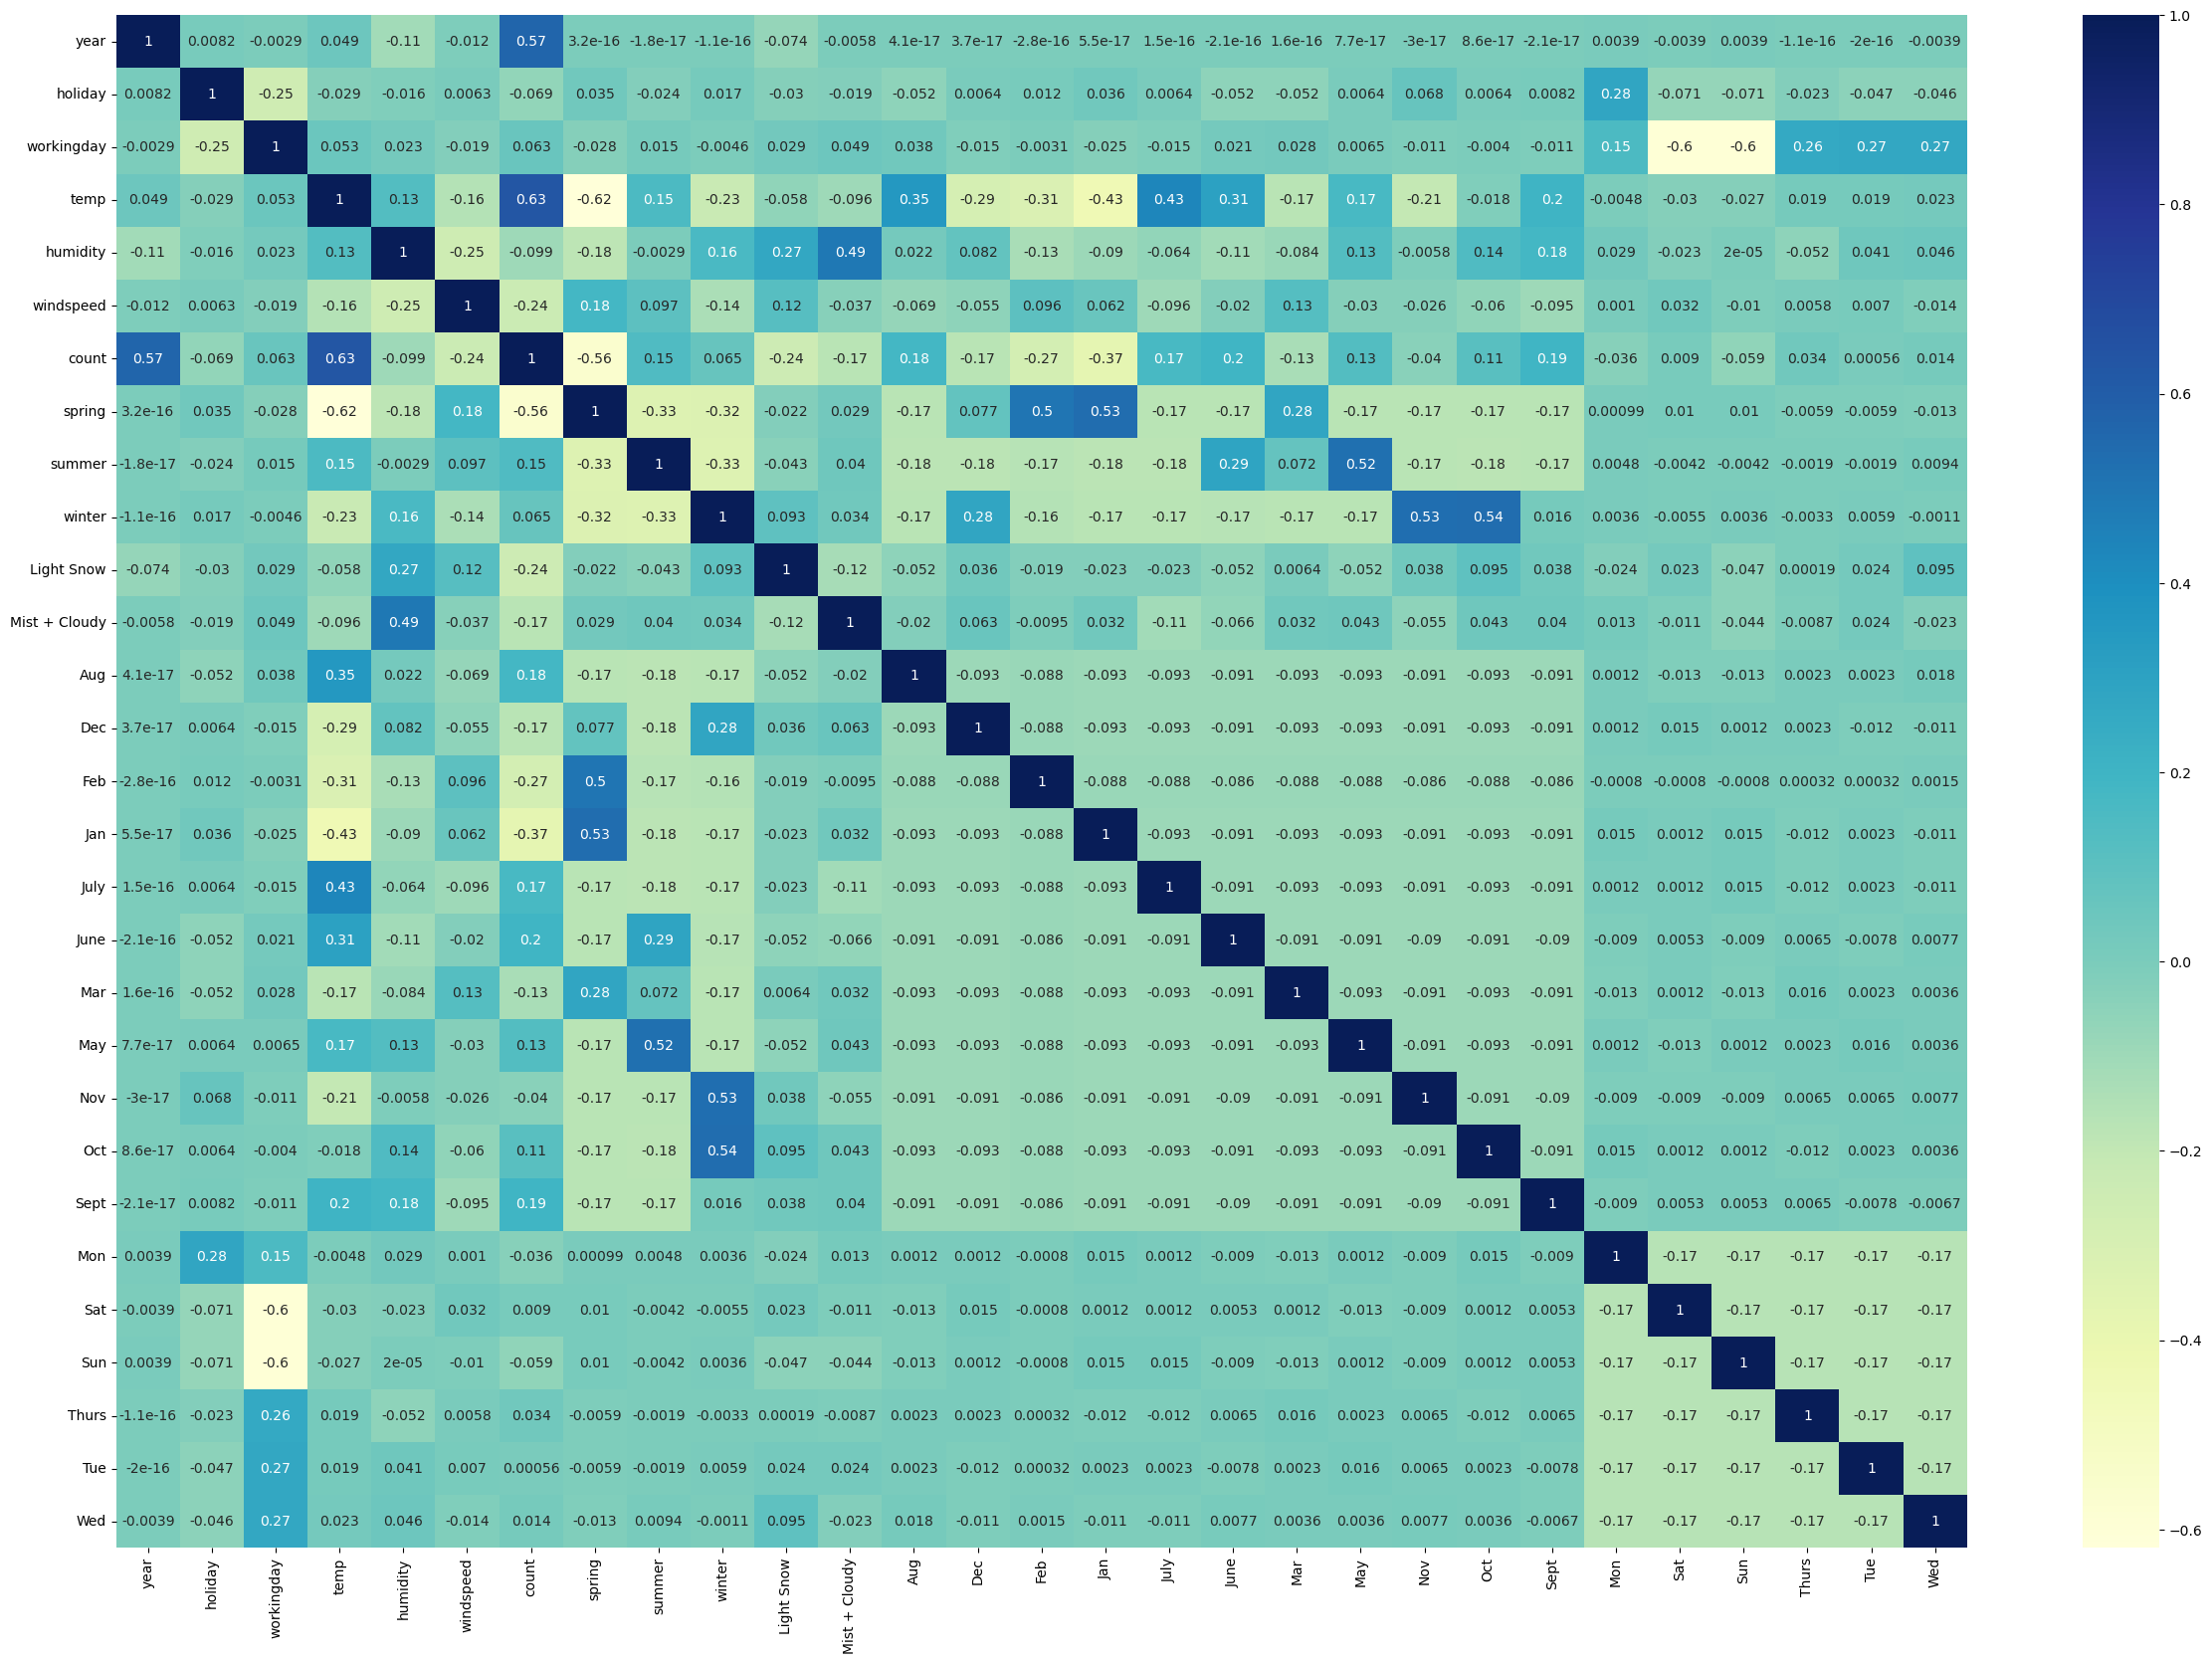

'\nObservations:\n From the correlation we can observer that year, temp, summer season, and july & september month have good correlation with count.\n'

In [738]:
# let's check the correlation now after creating dummy variables
plt.figure(figsize=(30,20))
sns.heatmap(bike_rental_df.corr(), annot=True, cmap="YlGnBu")
plt.show()

'''
Observations:
 From the correlation we can observer that year, temp, summer season, and july & september month have good correlation with count.
'''

## Splitting the data into Training and Testing sets

In [739]:
# Splitting the data into 70:30 train:test respectively
df_train, df_test = train_test_split(bike_rental_df, train_size=0.7, random_state=100)
print('training data shape: ', df_train.shape)
print('testing data shape: ', df_test.shape)

training data shape:  (510, 29)
testing data shape:  (220, 29)


### Scaling the Columns using Normalization technique

In [740]:
# scaling temp, humidity, windspeed, count variables
varList_to_scale = ['humidity', 'temp', 'windspeed', 'count']

min_max_scaler = MinMaxScaler()
df_train[varList_to_scale] = min_max_scaler.fit_transform(df_train[varList_to_scale])
df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,count,spring,summer,winter,Light Snow,Mist + Cloudy,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thurs,Tue,Wed
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [741]:
df_train[varList_to_scale].describe()

,humidity,temp,windspeed,count
count,510.000000,510.000000,510.000000,510.000000
mean,0.650480,0.537440,0.320883,0.513499
std,0.145846,0.225858,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.538643,0.339853,0.199179,0.356420
50%,0.653714,0.542596,0.296763,0.518638
75%,0.754830,0.735215,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


#### Extraction X_train and y_train from the training dataset

In [742]:
y_train = df_train.pop('count')
X_train = df_train

In [743]:
X_train.head()

,year,holiday,workingday,temp,humidity,windspeed,spring,summer,winter,Light Snow,Mist + Cloudy,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept,Mon,Sat,Sun,Thurs,Tue,Wed
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Building a linear model

### Using Recursive Feature Selection (RFE)

In [744]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [745]:
# list of variables selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', False, 14),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 5),
 ('Feb', False, 8),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 4),
 ('May', False, 2),
 ('Nov', False, 3),
 ('Oct', True, 1),
 ('Sept', True, 1),
 ('Mon', False, 13),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thurs', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 9)]

In [746]:
# filtering columns where RFE support is true
cols = X_train.columns[rfe.support_]
cols

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'Light Snow', 'Mist + Cloudy', 'Jan', 'July', 'Oct', 'Sept',
       'Sat', 'Sun'],
      dtype='object')

In [747]:
# Columns for which RFE support was False
X_train.columns[~rfe.support_]

Index(['summer', 'winter', 'Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov',
       'Mon', 'Thurs', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed stats and analysis

In [748]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [749]:
def createLinearModel(X_train_df, y_train_df):
    lr = sm.OLS(y_train_df, X_train_df)
    lr_model = lr.fit()
    return lr_model

In [750]:
# Adding a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# creating the linear regression model
lr_model_1 = createLinearModel(X_train_rfe, y_train)

In [751]:
lr_model_1.params

const            0.287621
year             0.233626
holiday          0.008034
workingday       0.104429
temp             0.396634
humidity        -0.132537
windspeed       -0.185222
spring          -0.123063
Light Snow      -0.262774
Mist + Cloudy   -0.061102
Jan             -0.049620
July            -0.067879
Oct              0.063506
Sept             0.067073
Sat              0.115034
Sun              0.060125
dtype: float64

In [752]:
lr_model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.3
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          8.67e-190
Time:                        14:25:46   Log-Likelihood:                 513.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     495   BIC:                            -934.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2876      0.024     12.140      0.000       0.241       0.334
year              0.2336      0.008     28.952      0.000       0.218       0.249
holiday           0.0080      0.021      0.383      0.702      -0.033       0.049
workingday        0.1044      0.009     11.455      0.000       0.087       0.122
temp              0.3966      0.026     15.192      0.000       0.345       0.448
humidity         -0.1325      0.037     -3.572      0.000      -0.205      -0.060
windspeed        -0.1852      0.025     -7.269      0.000      -0.235      -0.135
spring           -0.1231      0.013     -9.380      0.000      -0.149      -0.097
Light Snow       -0.2628      0.026     -9.962      0.000      -0.315      -0.211
Mist + Cloudy    -0.0611      0.010     -5.883      0.000      -0.082      -0.041
Jan              -0.0496      0.017     -2.874      0.004      -0.084      -0.016
July             -0.0679      0.017     -3.962      0.000      -0.102      -0.034
Oct               0.0635      0.015      4.192      0.000       0.034       0.093
Sept              0.0671      0.016      4.323      0.000       0.037       0.098
Sat               0.1150      0.011     10.273      0.000       0.093       0.137
Sun               0.0601      0.012      5.101      0.000       0.037       0.083
==============================================================================
Omnibus:                       76.164   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.157
Skew:                          -0.738   Prob(JB):                     4.65e-45
Kurtosis:                       5.725   Cond. No.                     1.37e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.78e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Checking VIF (Variance Inflation Factor)

In [753]:
def getVIF(df):
    # dropping constant to calculate VIF
    df = df.drop(['const'], axis=1)
    
    vif = pd.DataFrame()
    X = df
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [754]:
getVIF(X_train_rfe)

,Features,VIF
2,workingday,36.54
13,Sat,8.91
14,Sun,8.69
1,holiday,2.33
3,temp,2.20
6,spring,2.01
4,humidity,1.85
8,Mist + Cloudy,1.55
9,Jan,1.52
10,July,1.31


##### Holiday is insignificant in presence of other variables due to high p-value and low VIF, thus it can be dropped

In [755]:
# Dropping holiday variable
X_train_new_1 = X_train_rfe.drop(['holiday'], axis=1)

In [756]:
# Rebuiling the model without holiday variable

# Adding a constant
X_train_rfe_1 = sm.add_constant(X_train_new_1)

# creating the linear regression model
lr_model_2 = createLinearModel(X_train_rfe_1, y_train)

In [757]:
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.3
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          8.67e-190
Time:                        14:25:47   Log-Likelihood:                 513.76
No. Observations:                 510   AIC:                            -997.5
Df Residuals:                     495   BIC:                            -934.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2957      0.038      7.793      0.000       0.221       0.370
year              0.2336      0.008     28.952      0.000       0.218       0.249
workingday        0.0964      0.026      3.777      0.000       0.046       0.147
temp              0.3966      0.026     15.192      0.000       0.345       0.448
humidity         -0.1325      0.037     -3.572      0.000      -0.205      -0.060
windspeed        -0.1852      0.025     -7.269      0.000      -0.235      -0.135
spring           -0.1231      0.013     -9.380      0.000      -0.149      -0.097
Light Snow       -0.2628      0.026     -9.962      0.000      -0.315      -0.211
Mist + Cloudy    -0.0611      0.010     -5.883      0.000      -0.082      -0.041
Jan              -0.0496      0.017     -2.874      0.004      -0.084      -0.016
July             -0.0679      0.017     -3.962      0.000      -0.102      -0.034
Oct               0.0635      0.015      4.192      0.000       0.034       0.093
Sept              0.0671      0.016      4.323      0.000       0.037       0.098
Sat               0.1070      0.027      3.965      0.000       0.054       0.160
Sun               0.0521      0.027      1.919      0.055      -0.001       0.105
==============================================================================
Omnibus:                       76.164   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              204.157
Skew:                          -0.738   Prob(JB):                     4.65e-45
Kurtosis:                       5.725   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [758]:
getVIF(X_train_rfe_1)

,Features,VIF
3,humidity,25.11
1,workingday,16.50
2,temp,13.63
4,windspeed,4.54
12,Sat,4.44
13,Sun,4.34
5,spring,2.49
7,Mist + Cloudy,2.19
0,year,2.07
8,Jan,1.66


##### Humidity variable can be dropped as its insignificant, have very high VIF

In [759]:
# Dropping humidity
X_train_new_2 = X_train_rfe_1.drop(['humidity'], axis=1)

In [760]:
# Rebuilding the model without humidity variable
# Adding a constant
X_train_rfe_2 = sm.add_constant(X_train_new_2)

# creating the linear regression model
lr_model_3 = createLinearModel(X_train_rfe_2, y_train)

In [761]:
lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.3
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          3.16e-188
Time:                        14:25:47   Log-Likelihood:                 507.27
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     496   BIC:                            -927.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2152      0.031      6.968      0.000       0.155       0.276
year              0.2366      0.008     29.140      0.000       0.221       0.253
workingday        0.0979      0.026      3.793      0.000       0.047       0.149
temp              0.3804      0.026     14.624      0.000       0.329       0.431
windspeed        -0.1585      0.025     -6.433      0.000      -0.207      -0.110
spring           -0.1211      0.013     -9.133      0.000      -0.147      -0.095
Light Snow       -0.2991      0.025    -12.148      0.000      -0.347      -0.251
Mist + Cloudy    -0.0821      0.009     -9.481      0.000      -0.099      -0.065
Jan              -0.0515      0.017     -2.948      0.003      -0.086      -0.017
July             -0.0619      0.017     -3.589      0.000      -0.096      -0.028
Oct               0.0569      0.015      3.738      0.000       0.027       0.087
Sept              0.0635      0.016      4.056      0.000       0.033       0.094
Sat               0.1099      0.027      4.027      0.000       0.056       0.164
Sun               0.0510      0.027      1.856      0.064      -0.003       0.105
==============================================================================
Omnibus:                       78.476   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.848
Skew:                          -0.755   Prob(JB):                     3.66e-47
Kurtosis:                       5.790   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [762]:
getVIF(X_train_rfe_2)

,Features,VIF
2,temp,11.12
1,workingday,10.82
3,windspeed,4.51
11,Sat,3.20
12,Sun,2.98
4,spring,2.44
0,year,2.06
7,Jan,1.64
6,Mist + Cloudy,1.59
8,July,1.38


In [763]:
X_train_new_3 = X_train_rfe_2.drop(['Sun'], axis=1)

In [764]:
X_train_rfe_3 = sm.add_constant(X_train_new_3)

# creating the linear regression model
lr_model_4 = createLinearModel(X_train_rfe_3, y_train)

In [765]:
lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.7
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          1.16e-188
Time:                        14:25:47   Log-Likelihood:                 505.51
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     497   BIC:                            -930.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2578      0.021     12.466      0.000       0.217       0.298
year              0.2368      0.008     29.088      0.000       0.221       0.253
workingday        0.0546      0.011      4.938      0.000       0.033       0.076
temp              0.3817      0.026     14.644      0.000       0.330       0.433
windspeed        -0.1591      0.025     -6.438      0.000      -0.208      -0.111
spring           -0.1214      0.013     -9.134      0.000      -0.148      -0.095
Light Snow       -0.2983      0.025    -12.088      0.000      -0.347      -0.250
Mist + Cloudy    -0.0816      0.009     -9.406      0.000      -0.099      -0.065
Jan              -0.0518      0.018     -2.961      0.003      -0.086      -0.017
July             -0.0610      0.017     -3.531      0.000      -0.095      -0.027
Oct               0.0572      0.015      3.755      0.000       0.027       0.087
Sept              0.0618      0.016      3.939      0.000       0.031       0.093
Sat               0.0666      0.014      4.682      0.000       0.039       0.095
==============================================================================
Omnibus:                       83.313   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.400
Skew:                          -0.791   Prob(JB):                     2.08e-51
Kurtosis:                       5.912   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [766]:
getVIF(X_train_rfe_3)

,Features,VIF
2,temp,6.63
1,workingday,4.34
3,windspeed,4.02
4,spring,2.21
0,year,2.05
11,Sat,1.75
7,Jan,1.61
6,Mist + Cloudy,1.55
8,July,1.37
10,Sept,1.22
